In [48]:

# heatmap plot

import pandas as pd
import numpy as np

from pathlib import Path

In [49]:
basket_scores_path = '/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_study/2023.06.22_AhS_PAPER_COHORT/basket_scores_4th_gen_zscored.tsv'
sub_basket_scores_path = '/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_study/2023.06.22_AhS_PAPER_COHORT/subbasket_scores_EGFR.tsv'


In [51]:
patients_list = [
                'H021-W3ZFUV-T1-E1',
                'H021-UJBX-M4-Q1',
                'H021-8DSJKN-T1-Q1',
                'H021-3CX96H-T1',
                'H021-M9ZE3G-M1-E1'
                ]
meta_data_path = '/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_MTBs_Evaluation/Metadata_Papercohort_230801.xlsx'
meta_data = pd.read_excel(meta_data_path)
meta = meta_data[meta_data['Sample name'].isin(patients_list)][['Sample name', 'Paper_pseudo_identifier']].set_index('Sample name').to_dict()['Paper_pseudo_identifier']

In [52]:
basekt_scores_df = pd.read_csv(basket_scores_path,sep='\t')
sub_basket_scores_df = pd.read_csv(sub_basket_scores_path,sep='\t')

In [53]:

protein_of_interest= "EGFR"

basekt_scores_df = basekt_scores_df[basekt_scores_df.Sample.isin(patients_list)]
basekt_scores_df = basekt_scores_df.set_index("Sample")
basekt_scores_df = basekt_scores_df['EGFR']
basekt_scores_df = pd.DataFrame(basekt_scores_df,columns=['EGFR'])

sub_basket_scores_df = sub_basket_scores_df[sub_basket_scores_df["Sample name"].isin(patients_list)]
sub_basket_scores_df = sub_basket_scores_df.set_index('Sample name')
sub_basket_scores_df = sub_basket_scores_df.drop(['EGFR_total_basket_score',  'Histologic subtype','EGFR - RTK - kinase activity'],axis=1)
df = sub_basket_scores_df.merge(basekt_scores_df,right_index=True,left_index=True)
df = df.drop(['index'],axis=1).T
min_df = df.min().min()
max_df = df.max().max()
   

 

In [54]:
df = df.fillna(-4.2)
df = df.loc[:,patients_list]
df.columns = df.columns.map(meta)

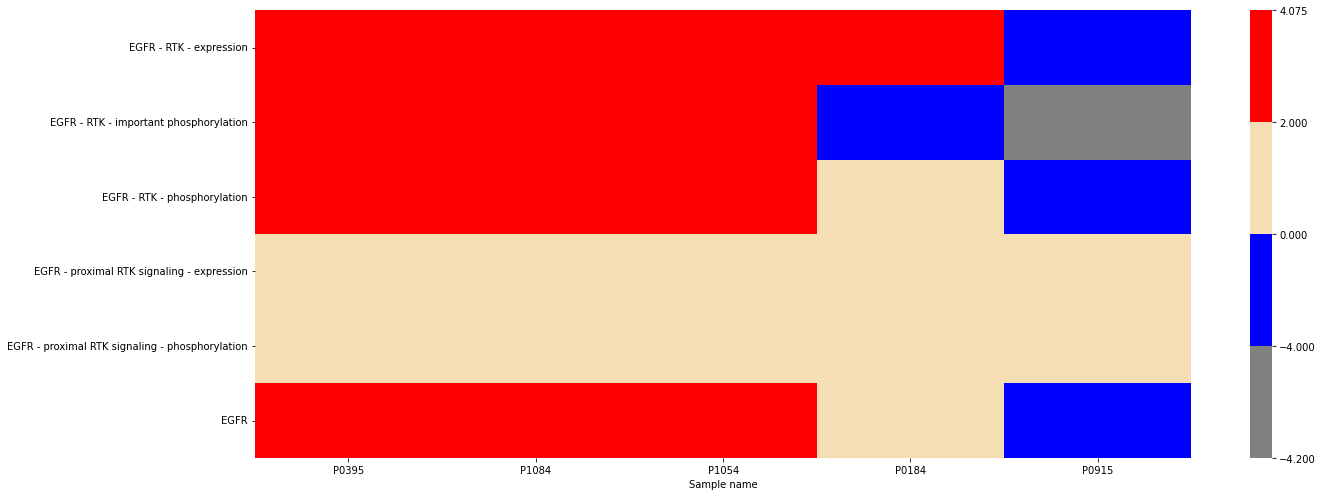

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
plt.rcParams["figure.figsize"] = [20, 7]
plt.rcParams["figure.autolayout"] = True

cmap = colors.ListedColormap(['grey','blue','wheat','red'])
bounds = [-4.2,min_df,0,2,max_df]
norm = colors.BoundaryNorm(bounds,cmap.N)
# plot heatmap
sns.heatmap(df,cmap=cmap,norm=norm)

plt.savefig('figure2B.svg')
plt.show()